# Numerische Optimierungsverfahren – Eindimensional

In diesem Notebook sind drei numerische Optimierungsverfahren zum Lösen von Minimierungsproblemen implementiert. 

Bei allen drei Verfahren wird ausgehend von einem Startwert iterativ, d.h. schrittweise, eine Lösungs berechnet.
In diesem Notebook könnt ihr den Startwert und die Schrittweite variieren und untersuchen wie nah die berechnete Lösung an dem tatäsächlichen globalen Minimalpunkt liegt. 

Überlegt zudem, wie hoch der Rechenaufwand der einzelnen Verfahren ist. Dazu könnt ihr beispielsweise die Anzahl der Funktionsauswertungen pro Iterationsschritt vergleichen. 

 
## Das Bergsteigerverfahren  <i class="fa fa-mountain"></i>
Beim Bergsteigerverfahrens werden die Funktionswerte $f(x^{(k)}-\alpha)$, $f(x^{(k)})$ und $f(x^{(k)}-\alpha)$ 
verglichen. Die nachfolgende Iterierte $x^{(k+1)}$ wird dann auf den Wert gesetzt, der zu einer Verbesserung des Funktionswertes im Vergleich zu $f(x^{(k)})$ geführt hat.


## Das Vorzeichenverfahren (±1?)
Die Iterationsvorschrift des Vorzeichenverfahrens lautet:

$x^{(k+1)}:=x^{(k)}-\alpha\cdot1 \;\;\; \;\;\;\;\;\; \;\;\;\;\text{für} \;\;\;  f'(x^{(k)})>0 $  
$x^{(k+1)}:=x^{(k)}-\alpha\cdot(-1) \;\;\; \;\;  \; \;\;\text{für} \;\;\;  f'(x^{(k)})<0 $  
$x^{(k+1)}:=x^{(k)}-\alpha\cdot 0 = x^{(k)} \;\;\;  \text{für} \;\;\;  f'(x^{(k)})=0 $


## Das Ableitungsverfahren (auch Gradientenverfahren)
Die Iterationsvorschrift des Gradientenabstiegsverfahrens lautet:

$x^{(k+1)}:=x^{(k)}-\alpha\cdot f'(x^{(k)} )$

## Pakete laden

Zunächst werden einige Python-Pakete geladen. 

<div id="exercise" class="alert alert-info">
    Führe den Code aus. Klicke dazu in das Codefeld und drücke auf den <i class="fa fa-play"></i> - Button oder "Shift" + "Enter".
    Du brauchst keine Änderungen am Code vornehmen.
</div>

In [11]:
# Pakete laden
import numpy as np
import matplotlib.pyplot as plt

## Definition verschiedener Zielfunktionen

In dem folgenden Codefeld werden verschiedene Zielfunktionen definiert. 

<div id="exercise" class="alert alert-info">
    Führe den Code aus. Klicke dazu in das Codefeld und drücke auf den <i class="fa fa-play"></i> - Button oder "Shift" + "Enter".<br>
    Du kannst weitere Zielfunktionen hinzufügen. Dazu wurden bereits f2 und f3 als Platzhalter definiert. Du kannst dort beliebige Funktionsvorschriften eingeben. 
</div>


In [12]:
# Definiere verschiedener eindimensionale Zielfunktionen und der zugehörigen Ableitungen
def f1(x):
    return np.cos(x) - 2 * np.sin(0.6 * x - 2) + 1 * np.cos(2 * x - 2)

def grad_f1(x):
    df_dx = -1 * np.sin(x) - 2 * 0.6 * np.cos(0.6 * x - 2) - 1 * 2 * np.sin(2 * x - 2)
    return df_dx

def f2(x):
    return x

def f3(x):
    return x

# Lege fest, für welche Zielfunktion die Verfahren im Folgenden eingesetzt werden sollen
f = f1
grad_f_eindim = grad_f1

## Startwert und eine Schrittweite

<div id="exercise" class="alert alert-info">
    Wähle einen Startwert und eine Schrittweite. Lege zudem fest nach wie vielen Iterationen das Verfahren beendet werden soll. <br>
    Führe den Code aus.
</div>


In [13]:
# Startwert
start_x = 0.0 # ungünstig: 1.5, ideal: 0.0

# Schrittweite
stepsize = 0.2 # ungünstig: 0.4, ideal: 0.2

# Maximale Anzahl Iterationen
num_steps = 1000

## Funktion zum Plotten der Funktion und der Iterationsschritte

Hier wird eine Funktion definiert, mit der wir uns die Iterationsschritte der Verfahren und den Funktionsgraphen ausgeben lassen können.

<div id="exercise" class="alert alert-info">
    Führe den Code aus. Klicke dazu in das Codefeld und drücke auf den <i class="fa fa-play"></i> - Button oder "Shift" + "Enter".
    Du brauchst keine Änderungen am Code vornehmen.
</div>


In [2]:
def plot_results(f, iterations, start_x, optimal_x, optimal_value):
    x = np.linspace(-5, 5, 400)
    y = np.array([f(xi) for xi in x])

    # Plot der Funktion
    plt.figure(figsize=(10, 8))
    plt.plot(x, y, label = 'Zielfunktion', linewidth = 4, color = 'grey')

    # Plotte Iterationen, Startwert, Endpunkt  
    plt.scatter(start_x, f(start_x), color='black', marker='v', s = 200, label='Startpunkt', zorder=4)
    plt.scatter(iterations[1:], [f(xi) for xi in iterations[1:]], marker='o', color='dimgray',  s = 100, label='Iterationsschritte',  zorder=3)
    plt.scatter(optimal_x, f(optimal_x), color='black', marker='o', s = 200, label='Berechnete Lösung', zorder=3)

    plt.xlabel('x', fontsize = 22)  
    plt.ylabel('f(x)', fontsize = 22)   

    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.legend(fontsize=22)
    plt.grid(True)
    # plt.savefig('../gradientenverfahren_1d_guenstig.png', dpi=300, bbox_inches='tight')

    return plt.show()

## Das Bergsteigerverfahren

In diesem Codefeld wird das Bergsteigerverfahren implementiert und zur Minimierung unserer Zielfunktion angewendet. Versuche die einzelnen Schritte des Algorithmus nachzuvollziehen. 

<div id="exercise" class="alert alert-info">
    Führe den Code aus.
</div>

In [5]:
# Bergsteigerverfahren
def bergsteigerverfahren(f, start_x, stepsize, num_steps,tolerance=1e-6):
    
    # Aktueller x-Wert jedes Iterationsschrittes
    x = start_x

    # Liste zum Speichern aller Iterationspunkte (für die grafische Darstellung)
    iterations = [x]

    for i in range(num_steps):
        current_value = f(x)
        left_value = f(x - stepsize)
        right_value = f(x + stepsize)
        iterations.append(x)

        # Falls Funktionswert links kleiner als aktueller Funktionswert, gehe nach links
        if left_value < current_value:
            x_new = x - stepsize
            
        # Falls Funktionswert rechts kleiner als aktueller Funktionswert, gehe nach rechts
        elif right_value < current_value:
            x_new = x + stepsize
        else:
            break 
            
        if abs(x_new - x) < tolerance:
            break
        
        if abs(f(x_new) - f(x)) < tolerance:
            break
            
        if f(x_new) > f(x):
            break
            
        x = x_new

        
    print("Optimales x:", x)
    print("Minimalwert von f(x):", f(x))
    
    return x, f(x), iterations


# Anwendung des Verfahrens
optimal_x, optimal_value, iterations = bergsteigerverfahren(f, start_x, stepsize, num_steps)

Optimales x: -3.800000000000001
Minimalwert von f(x): -3.5915900889413543


### Grafische Darstellung  
<div id="exercise" class="alert alert-info">
    Führe den Code aus.
</div>

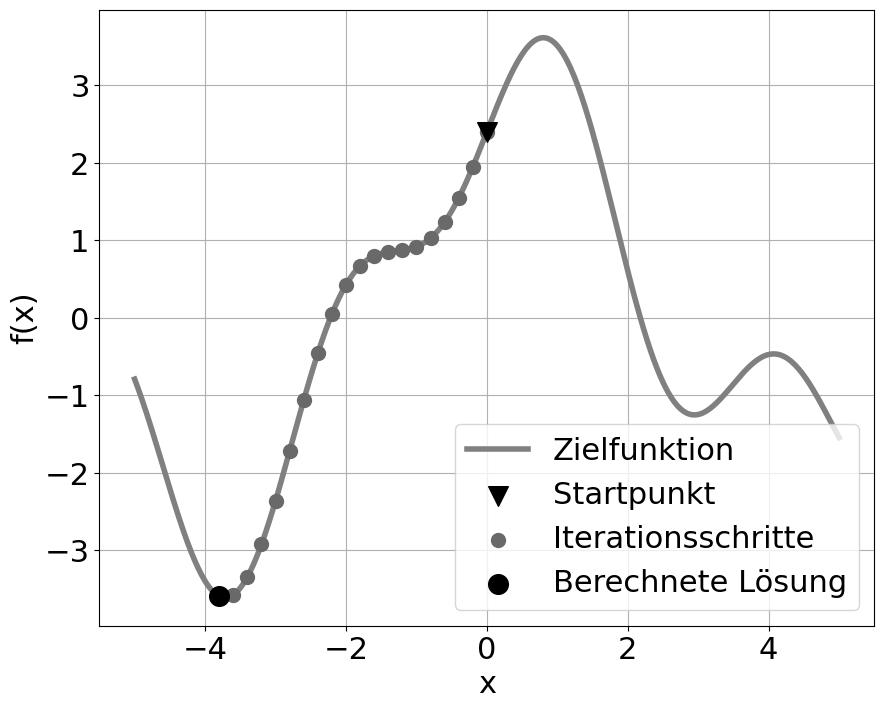

In [6]:
plot_results(f,iterations,start_x, optimal_x, optimal_value)

## Das Vorzeichenverfahren

In diesem Codefeld wird das Vorzeichenverfahren implementiert. Versuche die einzelnen Schritte des Algorithmus nachzuvollziehen. 

<div id="exercise" class="alert alert-info">
    Führe den Code aus.
</div>


In [7]:
def sign_descent(f, start_x, stepsize, num_steps, tolerance=1e-6):
    x = start_x
    iterations = [x]
    
    for i in range(num_steps):
        grad = grad_f_eindim(x)
        x_new = x - stepsize * np.sign(grad)
        iterations.append(x_new)
        
        if abs(x_new - x) < tolerance:
            break
        
        if abs(f(x_new) - f(x)) < tolerance:
            break
            
        if f(x_new) > f(x):
            break
        
        x = x_new

    print("Optimales x:", np.round(x,4))
    print("Minimalwert von f(x):", np.round(f(x),4))

    return x, f(x), np.array(iterations)

# Wende das Vorzeichenverfahren an
optimal_x, optimal_value, iterations = sign_descent(f, start_x, stepsize, num_steps)

Optimales x: -3.8
Minimalwert von f(x): -3.5916


### Plotten der Funktion und der Iterationsschritte
Die Iterationsschritte und den Funktionsgraphen werden im Folgenden grafisch dargestellt.

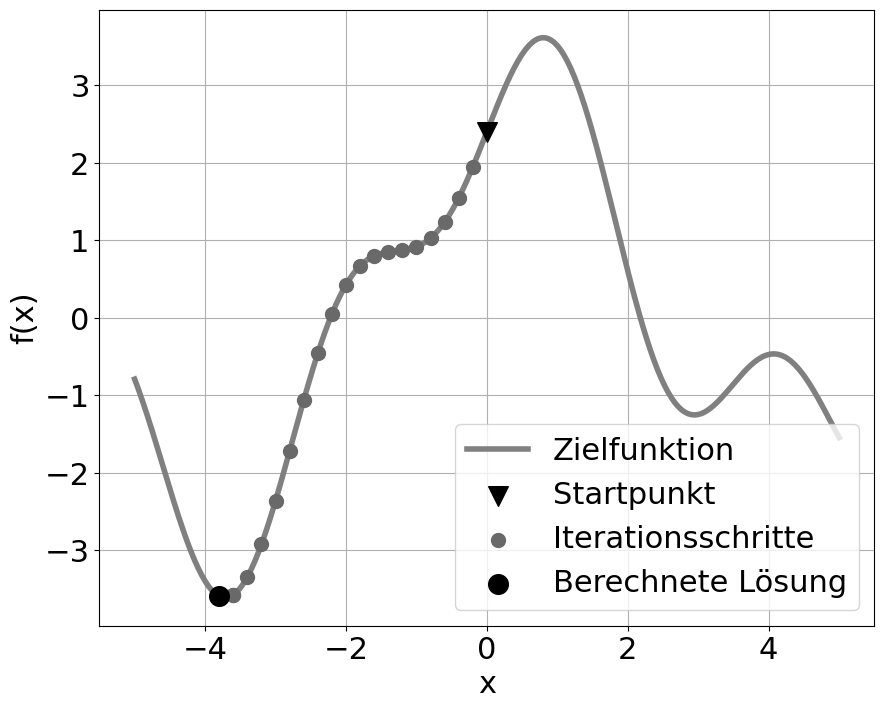

In [8]:
plot_results(f, iterations,start_x, optimal_x, optimal_value)

## Das Gradientenverfahren

In diesem Codefeld wird das Gradientenverfahren implementiert. Versuche die einzelnen Schritte des Algorithmus nachzuvollziehen. 

<div id="exercise" class="alert alert-info">
    Führe den Code aus.
</div>


In [9]:
def gradient_descent(f, start_x, stepsize, num_steps, tolerance=1e-6):
    x = start_x
    iterations = [x]
    
    for i in range(num_steps):
        grad = grad_f_eindim(x)
        x_new = x - stepsize * grad
        
        iterations.append(x_new)
        
        if abs(x_new - x) < tolerance:
            break
            
        if abs(f(x_new) - f(x)) < tolerance:
            break
            
        if f(x_new) > f(x):
            break
            
        x = x_new
        
    print("Optimales x:", np.round(x,4))
    print("Minimalwert von f(x):", np.round(f(x),4))
    
    return x, f(x), np.array(iterations)

# Wende das Gradientenabstiegsverfahren an
optimal_x, optimal_value, iterations = gradient_descent(f, start_x, stepsize, num_steps)

Optimales x: -3.716
Minimalwert von f(x): -3.6109


### Plotten der Funktion und der Iterationsschritte
Die Iterationsschritte und den Funktionsgraphen werden im Folgenden grafisch dargestellt.

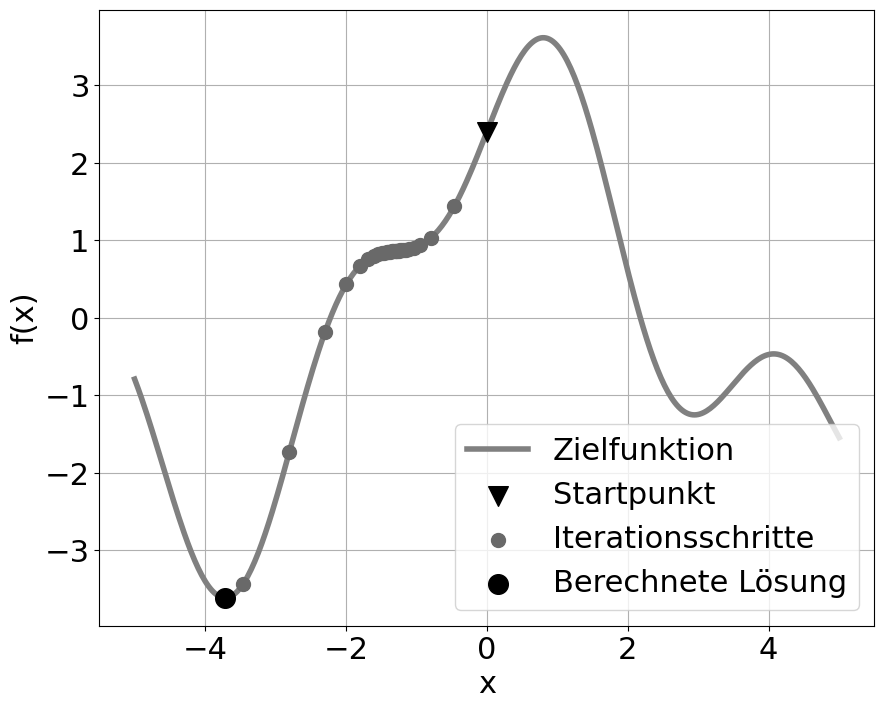

In [10]:
plot_results(f, iterations,start_x, optimal_x, optimal_value)